In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## define the maze

/Users/shinnosuke.yata/.pyenv/versions/3.6.5/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


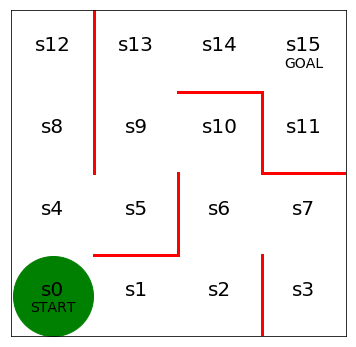

In [4]:
fig = plt.figure(figsize=(6, 6))
ax = plt.gca()  # gca = get current axes

# draw red wall
plt.plot([3, 4], [2, 2], color='red', linewidth=3)
plt.plot([2, 2], [1, 2], color='red', linewidth=3)
plt.plot([1, 1], [2, 4], color='red', linewidth=3)
plt.plot([1, 2], [1, 1], color='red', linewidth=3)
plt.plot([2, 3], [3, 3], color='red', linewidth=3)
plt.plot([3, 3], [2, 3], color='red', linewidth=3)
plt.plot([3, 3], [0, 1], color='red', linewidth=3)

# -- describe the state number
s_num = 0
for j in range(4):
    for i in range(4):
        plt.text(i+0.5, j+0.5, 's{}'.format(s_num), size=20, ha='center')
        s_num += 1
        
# -- setup the START and GOAL
plt.text(0.5, 0.3, 'START', ha='center', fontsize=14)
plt.text(3.5, 3.3, 'GOAL', ha='center', fontsize=14)

# -- reformat size
ax.set_xlim(0, 4)
ax.set_ylim(0, 4)
plt.tick_params(axis='both', which='both', bottom='off', top='off',
                labelbottom='off', right='off', left='off', labelleft='off')

# -- render the green circle in current state (initial state is START)
line, = ax.plot([0.5], [0.5], marker="o", color='g', markersize=80)

## define theta 

In [5]:
#                 ["UP"  , "RIGHT", "DOWN", "LEFT"]
theta = np.array([[1     , 1      , np.nan, np.nan], #s0
                  [np.nan, 1      , np.nan, 1     ], #s1
                  [1     , np.nan , np.nan, 1     ], #s2
                  [1     , np.nan , np.nan, np.nan], #s3
                  [1     , 1      , 1     , np.nan], #s4
                  [1     , np.nan , np.nan, 1     ], #s5
                  [1     , 1      , np.nan, 1     ], #s6
                  [np.nan, np.nan , 1     , 1     ], #s7
                  [1     , np.nan , 1     , np.nan], #s8
                  [1     , 1      , 1     , np.nan], #s9
                  [np.nan, np.nan , 1     , 1     ], #s10
                  [1     , np.nan , np.nan, np.nan], #s11
                  [np.nan, np.nan , 1     , np.nan], #s12
                  [np.nan, 1      , 1     , np.nan], #s13
                  [np.nan, 1      , np.nan, 1     ], #s14
])

## convert theta into Policy Pi

In [6]:
def convert_theta_into_pi(theta):
    
    i, j = theta.shape
    pi = np.zeros((i, j))
    for row in range(i):
        # get probability of action
        pi[row] = theta[row] / np.nansum(theta[row])
        
    pi = np.nan_to_num(pi)
    return pi

pi_0 = convert_theta_into_pi(theta)
print(pi_0)

[[0.5        0.5        0.         0.        ]
 [0.         0.5        0.         0.5       ]
 [0.5        0.         0.         0.5       ]
 [1.         0.         0.         0.        ]
 [0.33333333 0.33333333 0.33333333 0.        ]
 [0.5        0.         0.         0.5       ]
 [0.33333333 0.33333333 0.         0.33333333]
 [0.         0.         0.5        0.5       ]
 [0.5        0.         0.5        0.        ]
 [0.33333333 0.33333333 0.33333333 0.        ]
 [0.         0.         0.5        0.5       ]
 [1.         0.         0.         0.        ]
 [0.         0.         1.         0.        ]
 [0.         0.5        0.5        0.        ]
 [0.         0.5        0.         0.5       ]]


## initialize Q function

In [7]:
i, j = pi_0.shape
Q = np.random.rand(i, j) * theta * 0.1
# In order to avoid miss action in early exeperiments,
# multiplying 0.1 

print(Q)

[[0.0714953  0.08092915        nan        nan]
 [       nan 0.06720447        nan 0.09335311]
 [0.05482525        nan        nan 0.05268897]
 [0.08914985        nan        nan        nan]
 [0.02634581 0.03945406 0.07395829        nan]
 [0.04290086        nan        nan 0.08850969]
 [0.04377704 0.02036939        nan 0.03738754]
 [       nan        nan 0.05033141 0.03143685]
 [0.04055656        nan 0.0477392         nan]
 [0.07552037 0.02793587 0.04334175        nan]
 [       nan        nan 0.03386531 0.06764706]
 [0.02778356        nan        nan        nan]
 [       nan        nan 0.09179986        nan]
 [       nan 0.02204831 0.04211259        nan]
 [       nan 0.05987635        nan 0.02294616]]


In [8]:
def get_next_action(s, Q, pi, epsilon) -> str:
    # return 'UP', 'DOWN', 'RIGHT', 'LEFT'
    
    # epsilon-greedy
    if np.random.rand() < epsilon:
        next_action = np.random.choice(list(directions), p=pi[s, :])
    else:
        next_action = list(directions)[np.nanargmax(Q[s, :])] 
        
    return next_action

def get_s_next(s, next_a) -> int:
    # return state num
    
    for idx, act in enumerate(directions):
        if act == next_a:
            return s + directions[act]
        

In [10]:
# - test
# s = 9
# next_a = get_next_action(s, Q, pi_0, 0.3)
# print("next_action is {}".format(next_a))
# next_s = get_s_next(s, next_a)
# print("next state is {}".format(next_s))

## define Q learning

In [11]:
def update_q_table(Q, s, a, r, s_next, eta, gamma):
    
    a_col = action2col[a]
    if s_next == 15:
        Q[s, a_col] = Q[s, a_col] + eta * (r - Q[s, a_col])
        return Q.copy()
    else:
        Q[s, a_col] = Q[s, a_col] + eta * (r + gamma * np.nanmax(Q[s_next, :]) - Q[s, a_col])
        return Q.copy()

## define Sarsa

In [12]:
def Sarsa(Q, s, a, r, s_next, a_next, eta, gamma):

    a_col = action2col[a]
    if s_next == 15:  # goal
        Q[s, a_col] = Q[s, a_col] + eta * (r - Q[s, a_col])

    else:
        Q[s, a_col] = Q[s, a_col] + eta * (r + gamma * Q[s_next, a_next] - Q[s, a_col])

    return Q.copy()

In [13]:
def play_maze(Q, pi, epsilon, eta, gamma, update_method="q_learning"): # TODO: insert Sarsa
    # return state_action_history, updated Q function
    s = 0
    s_a_history = [[0, np.nan]]
    # substitute action later
    
    trial_num  = 0
    a_next = get_next_action(s, Q, pi, epsilon)
    # はじめなのでaをa_nextとも置く。
    
    while True:
        # print("current state: {}, next action : {}".format(s, action))
        action = a_next 
        
        trial_num += 1
        
        s_a_history[-1][1] = action
        
        s_next = get_s_next(s=s, next_a=action)
       
        s_a_history.append([s_next, np.nan])
        
        if s_next == 15:
            r = 1
            a_next = None
        else:
            r = 0
            a_next = get_next_action(s_next, Q, pi, epsilon)
        
        if update_method == "q_learning":
            Q = update_q_table(Q, s, action, r, s_next, eta, gamma)
        if update_method == "sarsa":
            Q = update_q_table(Q, s, action, r, s_next, a_next, eta, gamma)
        
        if s_next == 15:
            break
        else:
            s = s_next
        
    return s_a_history, Q


In [14]:
# - define the const

eta = 0.1   # learning rate
GAMMA = 0.9 # discount rate
epsilon = 0.5
continue_flg = True
episode = 1
directions = {'UP'   :  4,
              'RIGHT':  1,
              'DOWN' : -4,
              'LEFT' : -1
             }

action2col = { act: col for col,act in enumerate(directions) }
i, j = pi_0.shape
Q = np.random.rand(i, j) * theta * 0.1
initial_Q = Q.copy()
V = np.nanmax(Q, axis=1).reshape(1, -1)
print(V)

while continue_flg:
    
    print("========== Episode: {} ==========".format(episode))
    epsilon /= 2
    
    s_a_history, new_Q = play_maze(Q, pi_0, epsilon, eta, GAMMA)
    new_v = np.nanmax(new_Q, axis=1).reshape(1, -1)
    V = np.append(V, new_v, axis=0)
    Q = new_Q.copy()
    print("step size in this trial is {}.".format(len(s_a_history)-1))
    
    episode += 1
    if episode >= 100:
        continue_flg = False

[[0.07107708 0.07620651 0.09115037 0.09127477 0.09567749 0.08763554
  0.06003362 0.02882499 0.09496063 0.08619738 0.04552352 0.01018093
  0.06903207 0.08603257 0.04642954]]
========== Episode: 1 ==========
step size in this trial is 74.
========== Episode: 2 ==========
step size in this trial is 38.
========== Episode: 3 ==========
step size in this trial is 38.
========== Episode: 4 ==========
step size in this trial is 100.
========== Episode: 5 ==========
step size in this trial is 8.
========== Episode: 6 ==========
step size in this trial is 8.
========== Episode: 7 ==========
step size in this trial is 8.
========== Episode: 8 ==========
step size in this trial is 8.
========== Episode: 9 ==========
step size in this trial is 8.
========== Episode: 10 ==========
step size in this trial is 8.
========== Episode: 11 ==========
step size in this trial is 8.
========== Episode: 12 ==========
step size in this trial is 8.
========== Episode: 13 ==========
step size in this trial is 8.

# TODO : investigate the differences between q-learning and Sarsa